# Uber Trips Simple Analysis

### Lodaind and checking data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

In [2]:
apr_14 = pd.read_csv('C:/Users/Ola/Downloads/Uber-dataset/Uber-dataset/uber-raw-data-apr14.csv')
may_14 = pd.read_csv('C:/Users/Ola/Downloads/Uber-dataset/Uber-dataset/uber-raw-data-may14.csv')
jun_14 = pd.read_csv('C:/Users/Ola/Downloads/Uber-dataset/Uber-dataset/uber-raw-data-jun14.csv')
jul_14 = pd.read_csv('C:/Users/Ola/Downloads/Uber-dataset/Uber-dataset/uber-raw-data-jul14.csv')
aug_14 = pd.read_csv('C:/Users/Ola/Downloads/Uber-dataset/Uber-dataset/uber-raw-data-aug14.csv')
sep_14 = pd.read_csv('C:/Users/Ola/Downloads/Uber-dataset/Uber-dataset/uber-raw-data-sep14.csv')

In [3]:
# merging datasets
data_2014 = pd.concat([apr_14, may_14, jun_14, jul_14, aug_14, sep_14], ignore_index=True)

In [4]:
data_2014.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [6]:
#converting Date/Time column
data_2014['Date/Time'] = pd.to_datetime(data_2014['Date/Time'], format="%m/%d/%Y %H:%M:%S")
data_2014['Day of Week'] = data_2014['Date/Time'].dt.day_name()
data_2014['Month'] = data_2014['Date/Time'].dt.month
data_2014['Hours'] = data_2014['Date/Time'].dt.hour
data_2014['Minutes'] = data_2014['Date/Time'].dt.minute

In [7]:
data_2014.head()

,Date/Time,Lat,Lon,Base,Day of Week,Month,Hours,Minutes
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,4,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,4,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,4,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,4,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,4,0,33


In [8]:
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date/Time    datetime64[ns]
 1   Lat          float64       
 2   Lon          float64       
 3   Base         object        
 4   Day of Week  object        
 5   Month        int64         
 6   Hours        int64         
 7   Minutes      int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 276.8+ MB


### Analysis

In [11]:
#Plotting the trips by the hours in a day
#Grouping data
hour_data = data_2014.groupby(['Hours'])['Date/Time'].count()
hour_data

Hours
0     103836
1      67227
2      45865
3      48287
4      55230
5      83939
6     143213
7     193094
8     190504
9     159967
10    159148
11    165703
12    170452
13    195877
14    230625
15    275466
16    313400
17    336190
18    324679
19    294513
20    284604
21    281460
22    241858
23    169190
Name: Date/Time, dtype: int64

Text(0.5, 1.0, 'Trips by hours')

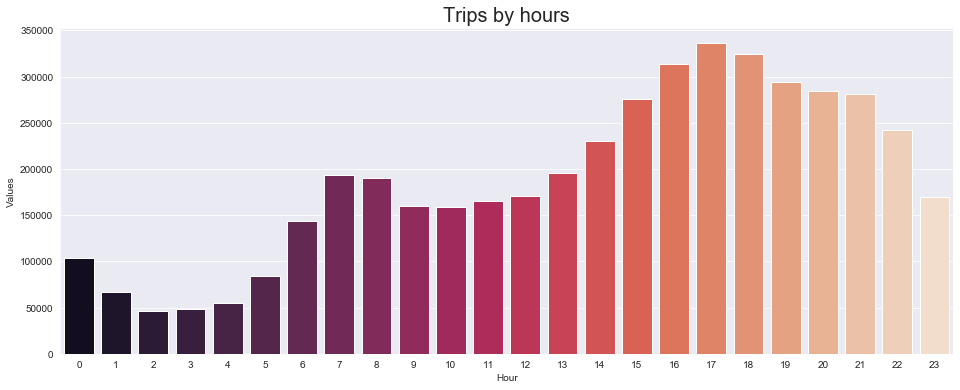

In [59]:
plt.figure(figsize=(16,6))
sns.countplot(x='Hours', data = data_2014, palette='rocket')
plt.xlabel('Hour')
plt.ylabel('Values')
plt.title('Trips by hours', size=20)

##### Number of trips peaks during the time when people are going back home from work. The growth continues also during evening hours.

In [47]:
#adding day column
data_2014['Day'] = data_2014['Date/Time'].dt.day

In [48]:
data_2014.head()

,Date/Time,Lat,Lon,Base,Day of Week,Month,Hours,Minutes,Day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,4,0,11,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,4,0,17,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,4,0,21,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,4,0,28,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,4,0,33,1


Text(0.5, 1.0, 'Trips Every Day')

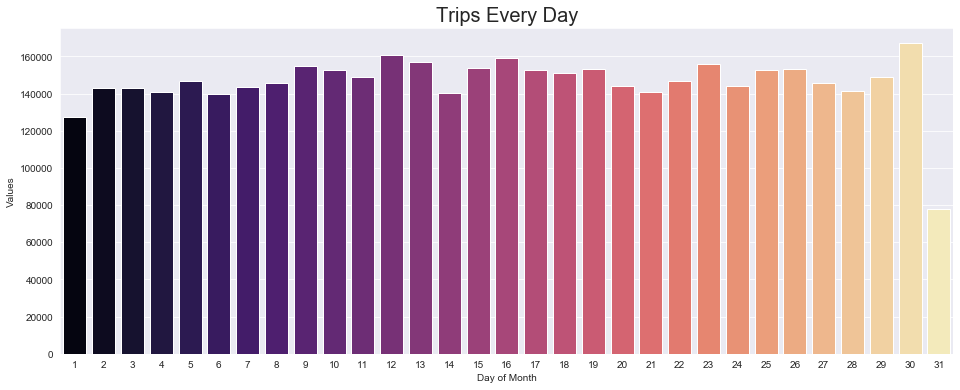

In [85]:
plt.figure(figsize=(16,6))
sns.countplot(x='Day', data = data_2014, palette='magma')
plt.xlabel('Day of Month')
plt.ylabel('Values')
plt.title('Trips Every Day', size=20)

##### The lowest score for every day trips falls on first and last day of month.

In [64]:
#Plotting the trips by the hours and month
day_month_group = data_2014.groupby(['Day', 'Month'])['Date/Time'].count()
day_month_group

Day  Month
1    4        14546
     5        23375
     6        15967
     7        21228
     8        32353
              ...  
30   8        23930
     9        33431
31   5        21261
     7        33541
     8        23271
Name: Date/Time, Length: 183, dtype: int64

In [76]:
#adding Month name column
data_2014['Month of Year'] = data_2014['Date/Time'].dt.month_name()

Text(0.5, 1.0, 'Trips by Day and Month')

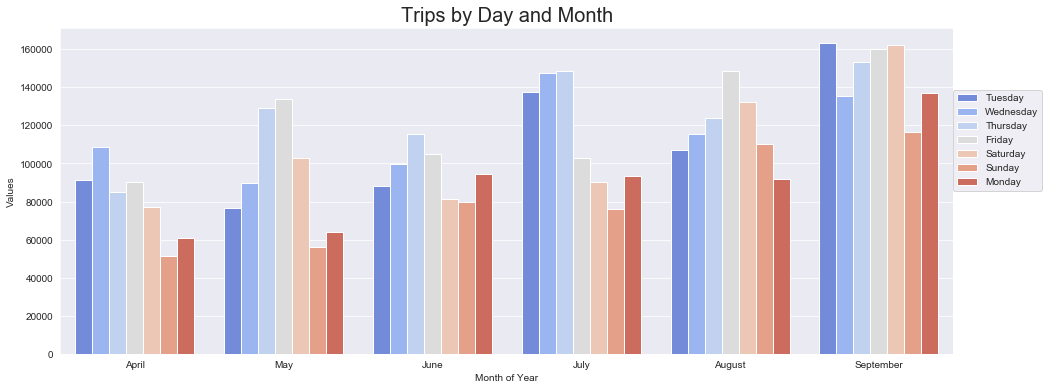

In [83]:
plt.figure(figsize=(16,6))
sns.countplot(x='Month of Year', data=data_2014, hue='Day of Week', palette='coolwarm')
plt.legend(loc=(1, 0.5))
plt.xlabel('Month of Year')
plt.ylabel('Values')
plt.title('Trips by Day and Month', size=20)

##### Each month had different day of week with most trips.

Text(0.5, 1.0, 'Trips by Month')

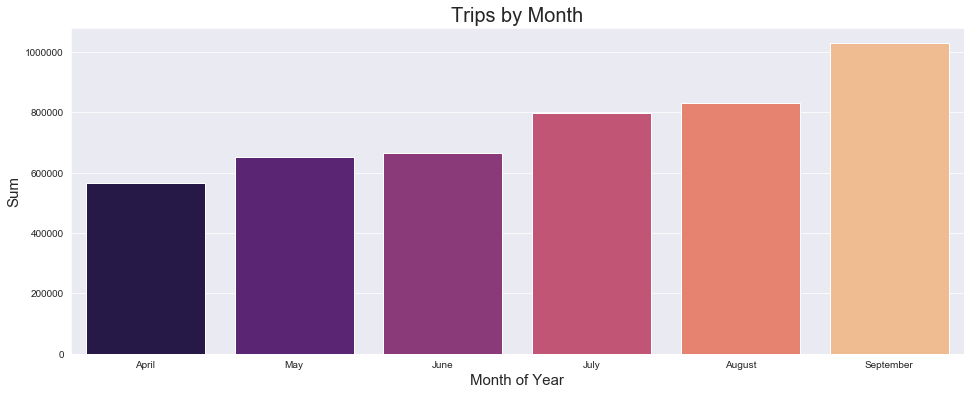

In [114]:
plt.figure(figsize=(16,6))
sns.countplot(x='Month of Year', data = data_2014, palette='magma')
plt.xlabel('Month of Year', fontsize=15)
plt.ylabel('Sum', fontsize=15)
plt.title('Trips by Month', size=20)

##### September is the best month. There is gradual increase in the number of trips from April to September.